In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [ ]:
bhp = pd.read_csv("drive/My Drive/Colab Notebooks/TideXGboost/bhp/BHPtraining.csv")
bhp.head()

,Date Time,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,2017-01-01 00:00:00,NaN,2.418,0.000,NaN,NaN,NaN
1,2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2,2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
3,2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
4,2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64


In [ ]:
## print shape of dataset with rows and columns
print(bhp.shape)



(262800, 7)


Handling Missing Values


In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in bhp.columns if bhp[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(bhp[feature].isnull().mean(), 4),  ' % missing values')

Air Temperature 0.2135  % missing values
Water Level Sigma 0.0014  % missing values
Wind Speed 0.1612  % missing values
Wind Direction 0.1612  % missing values
Wind Gust 0.1612  % missing values


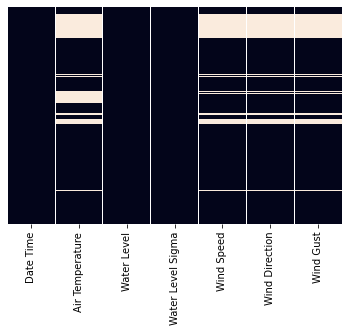

In [ ]:
sns.heatmap(bhp.isnull(),yticklabels=False,cbar=False)

In [ ]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date Time          262800 non-null  object 
 1   Air Temperature    206703 non-null  float64
 2   Water Level        262800 non-null  float64
 3   Water Level Sigma  262443 non-null  float64
 4   Wind Speed         220435 non-null  float64
 5   Wind Direction     220435 non-null  float64
 6   Wind Gust          220435 non-null  float64
dtypes: float64(6), object(1)
memory usage: 14.0+ MB


In [ ]:
bhp.isnull().sum()

Date Time                0
Air Temperature      56097
Water Level              0
Water Level Sigma      357
Wind Speed           42365
Wind Direction       42365
Wind Gust            42365
dtype: int64

In [ ]:
bhp = bhp.interpolate(method = "linear").bfill()
bhp

,Date Time,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,2017-01-01 00:00:00,63.9,2.418,0.000,5.64,145.0,6.80
1,2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2,2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
3,2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
4,2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64
...,...,...,...,...,...,...,...
262795,2019-12-31 23:30:00,58.8,1.444,0.200,14.00,40.0,15.55
262796,2019-12-31 23:36:00,58.8,1.381,0.184,13.61,32.0,16.13
262797,2019-12-31 23:42:00,58.8,1.493,0.230,13.41,31.0,15.16
262798,2019-12-31 23:48:00,59.0,1.516,0.220,13.61,37.0,16.13


In [ ]:
bhp['Date Time'] = pd.to_datetime(bhp['Date Time'])
df_train = bhp.set_index('Date Time').resample('12H').mean()
df_train

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,64.251667,1.944258,0.163250,5.849083,143.191667,6.575167
2017-01-01 12:00:00,68.385000,1.280625,0.137633,10.070750,143.150000,11.800750
2017-01-02 00:00:00,66.775833,2.021567,0.110650,11.112167,131.641667,12.187750
2017-01-02 12:00:00,72.377500,0.758417,0.105017,9.511750,233.975000,12.013917
2017-01-03 00:00:00,63.644167,1.488425,0.148100,4.435417,220.733333,5.413667
...,...,...,...,...,...,...
2019-12-29 12:00:00,67.654167,0.945117,0.486375,10.266750,278.383333,12.994667
2019-12-30 00:00:00,59.510833,1.871167,0.344325,10.535750,216.491667,12.497333
2019-12-30 12:00:00,58.531667,0.839258,0.269725,10.983917,108.775000,12.876000


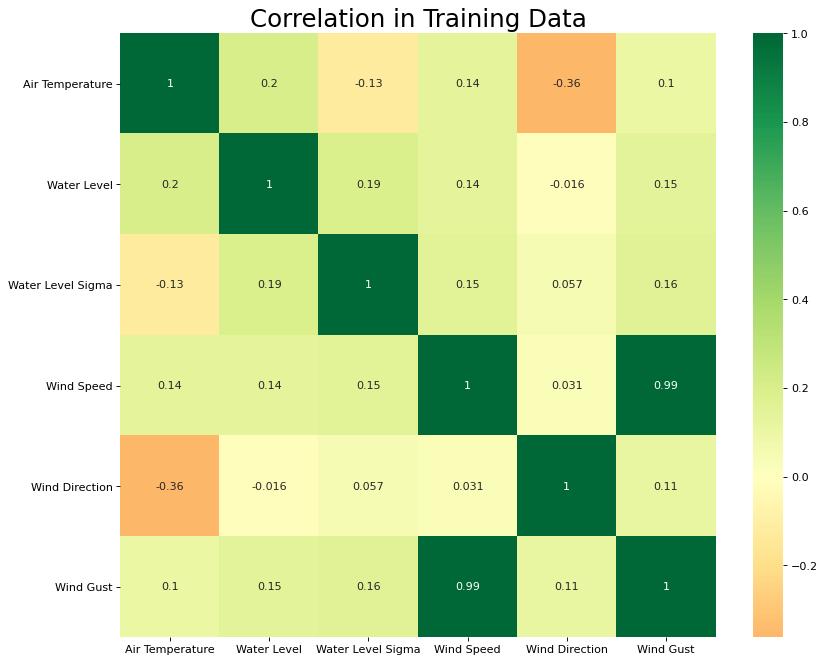

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_train.corr(), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation in Training Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 800x640 with 0 Axes>

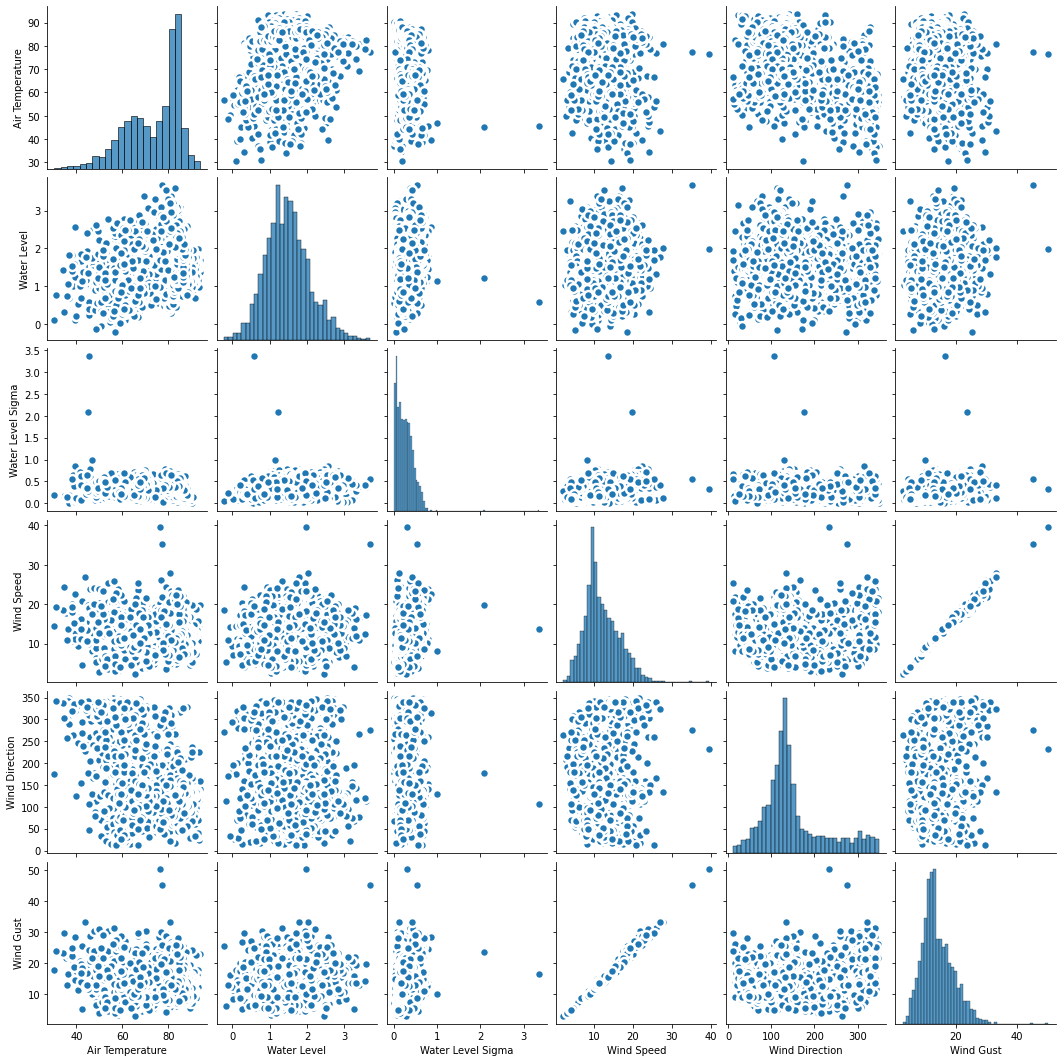

In [ ]:
# Pair Plot of Training Data
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_train, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.savefig('train.png')
plt.show()

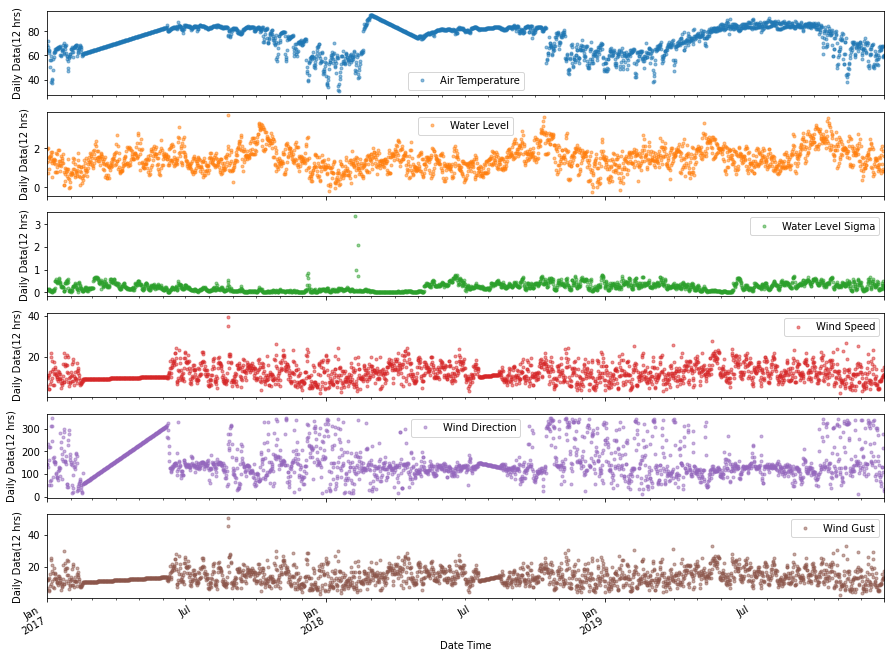

In [ ]:
cols_plot = ['Air Temperature',	'Water Level','Water Level Sigma','Wind Speed','Wind Direction','Wind Gust']
axes = df_train[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Data(12 hrs)')
plt.savefig('alltrain.png')

In [ ]:
bhpt = pd.read_csv('drive/My Drive/Colab Notebooks/TideXGboost/bhp/BHPtest.csv') 
bhpt.head(5)

,Date Time,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,2020-01-01 00:00:00,59.0,1.499,0.197,12.44,30.0,15.94
1,2020-01-01 00:06:00,59.0,1.486,0.180,13.41,33.0,16.33
2,2020-01-01 00:12:00,59.2,1.490,0.194,12.83,37.0,14.97
3,2020-01-01 00:18:00,59.2,1.578,0.223,12.44,34.0,15.16
4,2020-01-01 00:24:00,59.0,1.522,0.194,13.22,28.0,16.13


In [ ]:
print(bhpt.shape)

(70579, 7)


In [ ]:
bhpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70579 entries, 0 to 70578
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Time          70579 non-null  object 
 1   Air Temperature    70054 non-null  float64
 2   Water Level        70495 non-null  float64
 3   Water Level Sigma  70495 non-null  float64
 4   Wind Speed         70052 non-null  float64
 5   Wind Direction     70052 non-null  float64
 6   Wind Gust          70052 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.8+ MB


In [ ]:
bhpt = bhpt.interpolate(method = "linear").bfill()
bhpt

,Date Time,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
0,2020-01-01 00:00:00,59.0,1.499,0.197,12.44,30.0,15.94
1,2020-01-01 00:06:00,59.0,1.486,0.180,13.41,33.0,16.33
2,2020-01-01 00:12:00,59.2,1.490,0.194,12.83,37.0,14.97
3,2020-01-01 00:18:00,59.2,1.578,0.223,12.44,34.0,15.16
4,2020-01-01 00:24:00,59.0,1.522,0.194,13.22,28.0,16.13
...,...,...,...,...,...,...,...
70574,2020-10-21 01:24:00,79.5,3.143,0.394,14.38,75.0,16.13
70575,2020-10-21 01:30:00,79.5,3.087,0.390,13.80,79.0,15.55
70576,2020-10-21 01:36:00,79.5,3.159,0.413,13.22,77.0,15.55
70577,2020-10-21 01:42:00,79.5,3.120,0.328,15.16,74.0,16.33


In [ ]:
bhpt['Date Time'] = pd.to_datetime(bhpt['Date Time'])
df_test = bhpt.set_index('Date Time').resample('12H').mean()
df_test

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750
...,...,...,...,...,...,...
2020-10-19 00:00:00,80.223333,2.394075,0.365842,14.327708,124.325000,16.449167
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250


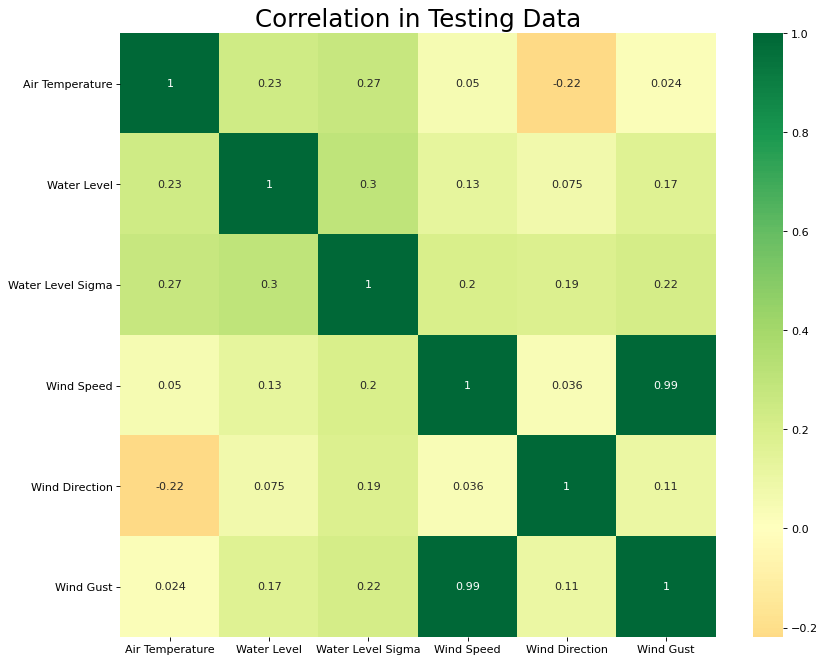

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_test.corr(), xticklabels=df_test.corr().columns, yticklabels=df_test.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation in Testing Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 800x640 with 0 Axes>

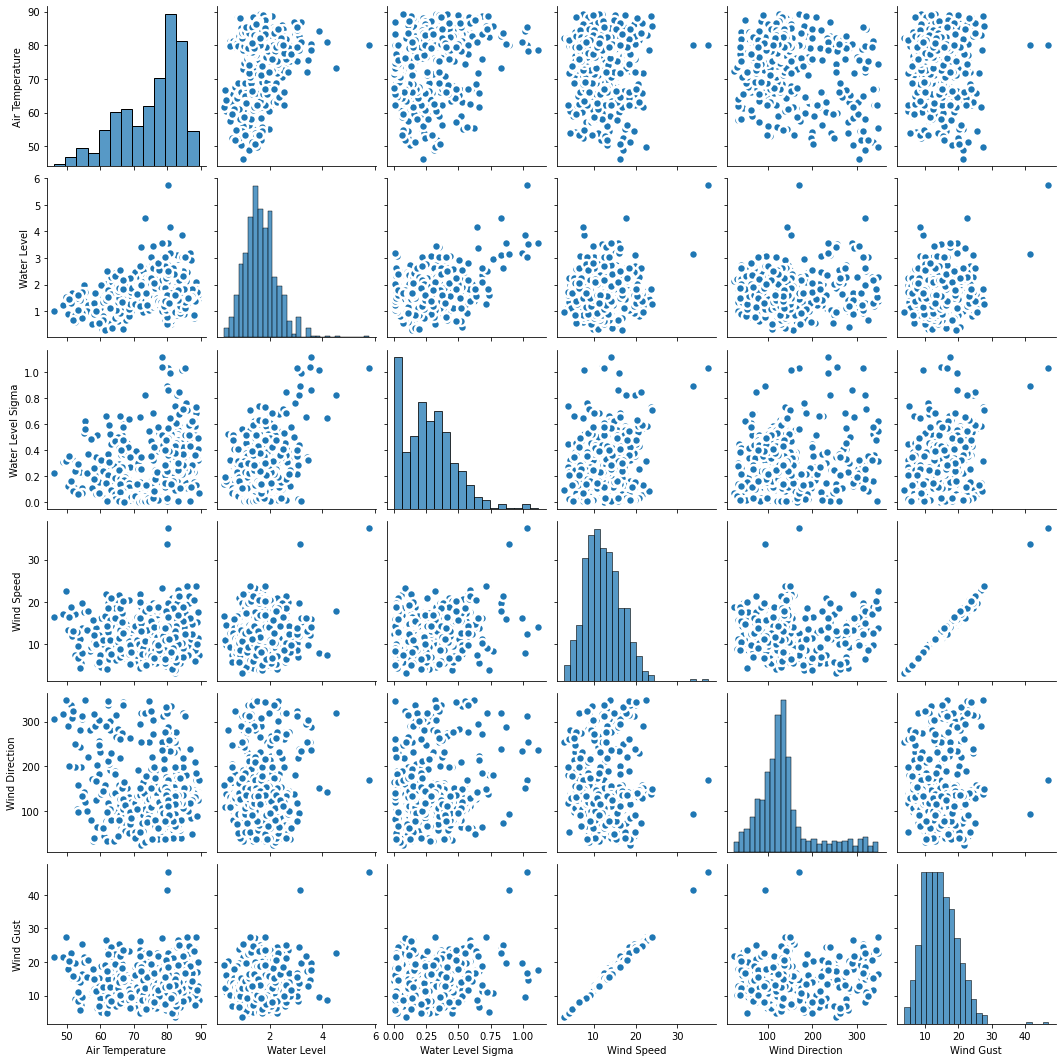

In [ ]:
# Pair Plot of Testing Data
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df_test, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.savefig('test.png')
plt.show()

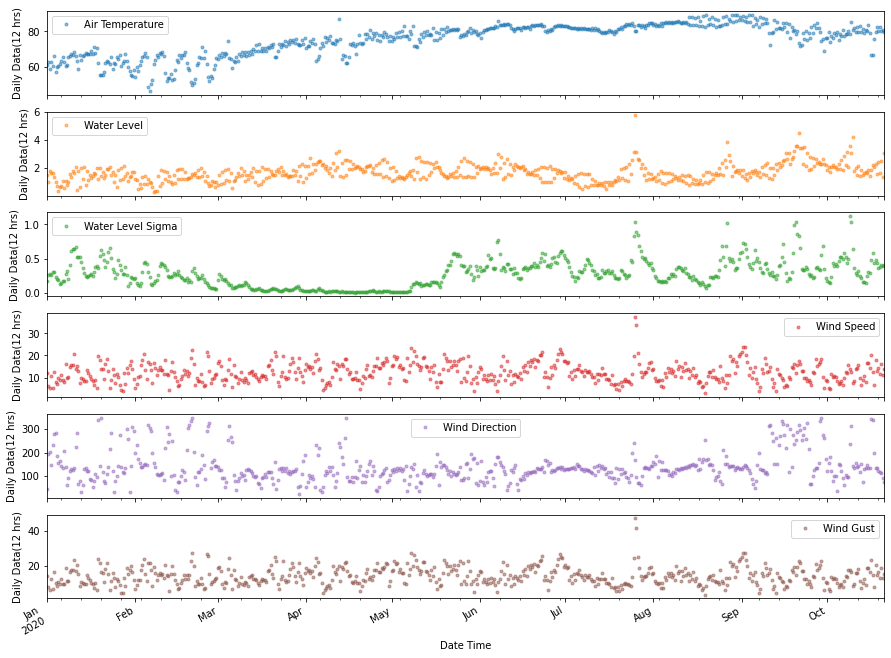

In [ ]:
cols_plot = ['Air Temperature',	'Water Level','Water Level Sigma','Wind Speed','Wind Direction','Wind Gust']
axes = df_test[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 12), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Data(12 hrs)')
plt.savefig('alltest.png')


Model 1 : All Features without Water Level

In [ ]:
df_Train= df_train.copy()
df_Test= df_test.copy()
X_train=df_Train.drop(['Water Level'],axis=1)
y_train=df_Train['Water Level']
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)
X_test = df_Test.drop(['Water Level'],axis=1)
Y_test = df_Test['Water Level']
Y_pred=classifier.predict(X_test)
df_Test

[21:40:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750
...,...,...,...,...,...,...
2020-10-19 00:00:00,80.223333,2.394075,0.365842,14.327708,124.325000,16.449167
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250


In [ ]:
#Model 1 Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error,median_absolute_error
print('Model 1 Metrics before hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Maximum Residual Error:', max_error(Y_test, Y_pred)) 
print('Median Absolute Error:',median_absolute_error(Y_test, Y_pred))
print('R2 Score:', r2_score(Y_test, Y_pred))

Model 1 Metrics before hyperparameters tuning
Mean Absolute Error: 0.42889193595408664
Mean Squared Error: 0.3161828934910896
Root Mean Squared Error: 0.5623014258305679
Maximum Residual Error: 3.2032081865946465
Median Absolute Error: 0.3377335322062167
R2 Score: 0.20409922901982303


Model 1: Hyperparameter Optimisation

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    9.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.7min


[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('Best Score: %s' % random_cv.best_score_)

Best Score: -0.427981850691553


In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(X_train,y_train)

[21:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred6 = regressor.predict(X_test)
y_pred6.shape

(589,)

In [ ]:
df_Test['Forecast'] = np.nan
df_Test['Forecast'] = y_pred6
df_Test

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,Forecast
Date Time,,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333,1.319045
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167,1.343513
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083,1.261596
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750,1.121105
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750,1.471094
...,...,...,...,...,...,...,...
2020-10-19 00:00:00,80.223333,2.394075,0.365842,14.327708,124.325000,16.449167,1.563357
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000,1.585505
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250,1.791816


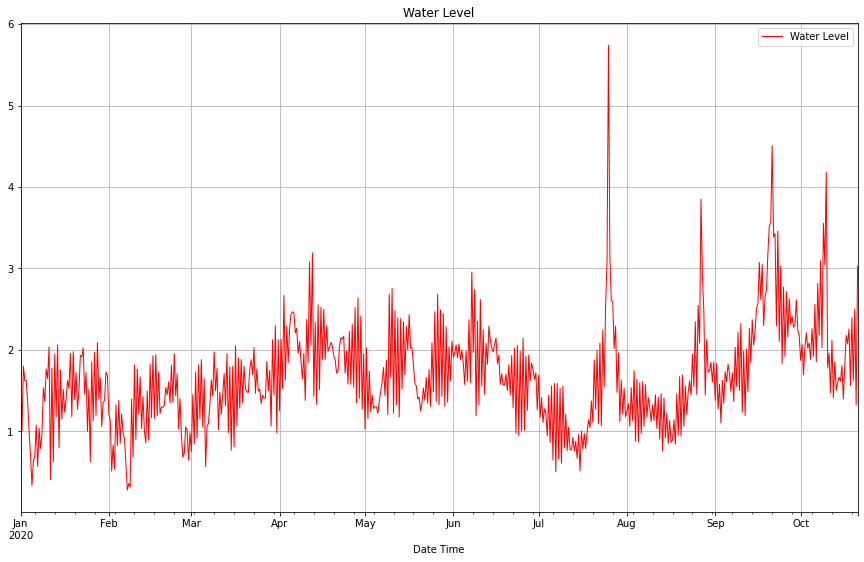

In [ ]:
df_Test['Water Level'].plot(label='Water Level', figsize=(15, 9), title='Water Level', color='red', linewidth=1.0, grid=True)
plt.legend()

In [ ]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df_Test['Water Level']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

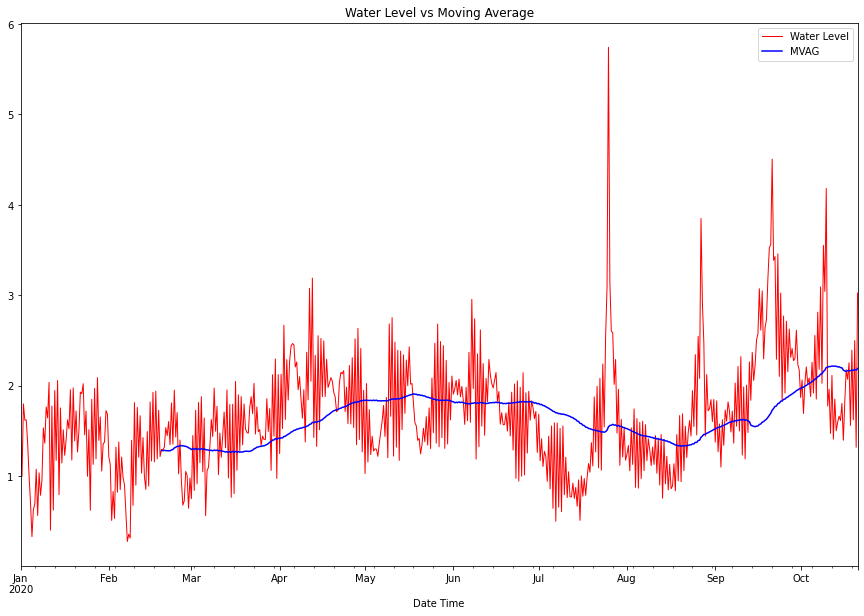

In [ ]:
df_Test['Water Level'].plot(label='Water Level', figsize=(15,10), title='Water Level vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

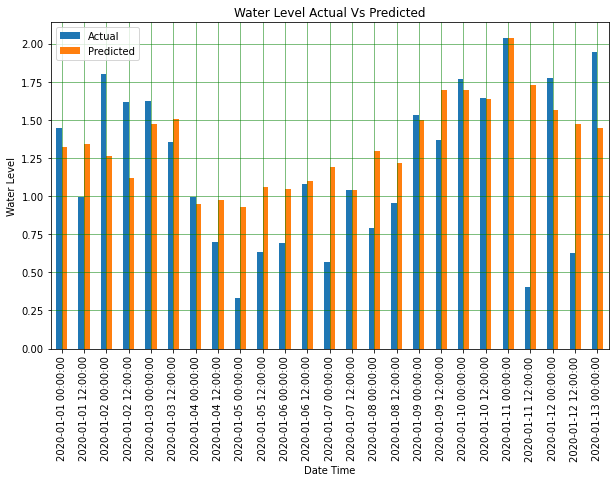

In [ ]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred6})
df3 = df2.head(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
plt.show()

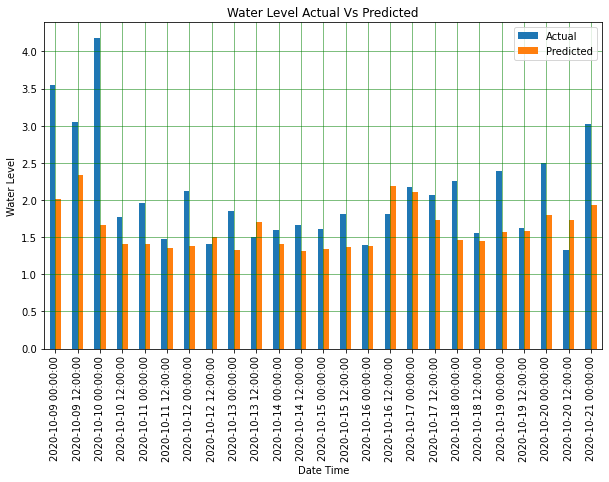

In [ ]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred6})
df3 = df2.tail(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
plt.show()

In [ ]:
df2.to_csv (r'C:\Users\vbhakta4\Desktop\model1.csv', index = True, header=True)

[21:42:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


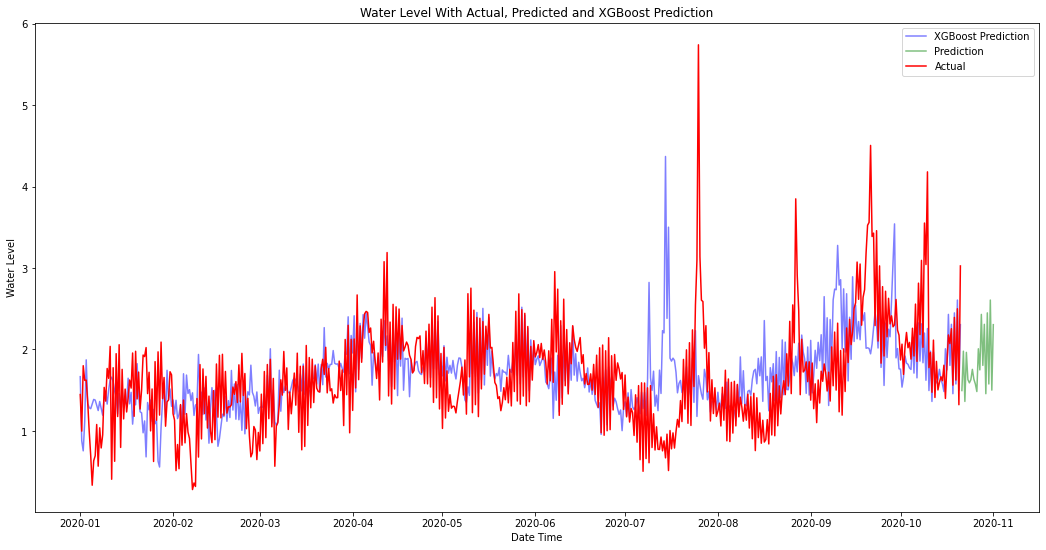

In [ ]:
#Model 1 Future Prediction
# Defining some Parameters
from datetime import datetime, timedelta
import math
from sklearn.model_selection import  train_test_split

# Number of days for which to predict the Water Level

predict_days = int(math.ceil(0.01 * len(df_Train)))

# Shifting by the Number of Predict days for Prediction array

df_Test['Prediction'] = df_Test['Water Level'].shift(-predict_days)

# Dropping the Prediction Row

X = np.array(df_Test.drop(['Prediction'], axis = 1))
X = X[:-predict_days]
y = np.array(df_Test['Prediction'])
y = y[:-predict_days]      # Size upto predict_days

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
classifier2=xgboost.XGBRegressor()
classifier2.fit(x_train,y_train)
X_predict = np.array(df_Test.drop(['Prediction'], 1))[-predict_days:]

model_predict_prediction = classifier2.predict(X_predict)
model_real_prediction = classifier2.predict(np.array(df_Test.drop(['Prediction'], 1)))
predicted_dates = []
recent_date = df_Test.index.max()
display_at = 0
alpha = 0.5

for i in range(predict_days):
    recent_date += timedelta(days=0.5)
    predicted_dates.append(recent_date)

plt.figure(figsize=(18, 9))
plt.plot(df_Test.index[display_at:], model_real_prediction[display_at:], label='XGBoost Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, model_predict_prediction, label='Prediction', color='green', alpha=alpha)
plt.plot(df_Test.index[display_at:], df_Test['Water Level'][display_at:], label='Actual', color='red')
plt.title('Water Level With Actual, Predicted and XGBoost Prediction')
plt.xlabel('Date Time')
plt.ylabel('Water Level')
plt.legend()

In [ ]:
#Model 1 Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error,median_absolute_error
print('Model 1 Metrics after hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred6))  
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred6))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred6)))
print('Maximum Residual Error:', max_error(Y_test, y_pred6)) 
print('Median Absolute Error:',median_absolute_error(Y_test, y_pred6)) 
print('R2 Score:', r2_score(Y_test, y_pred6))


Model 1 Metrics after hyperparameters tuning
Mean Absolute Error: 0.42484215850108564
Mean Squared Error: 0.3154858740717206
Root Mean Squared Error: 0.5616812922572022
Maximum Residual Error: 3.2335266852060967
Median Absolute Error: 0.34487076721191423
R2 Score: 0.20585377774679137


Model 2 : Only Water Level Feature

In [ ]:
#Model 2
df_Train1= df_train.copy()
df_Test1= df_test.copy()
X_train1 = df_Train1.drop(['Air Temperature', 'Water Level Sigma','Wind Speed','Wind Direction','Wind Gust'],axis=1)
y_train1 = df_Train1['Water Level'] 
classifier1=xgboost.XGBRegressor()
classifier1.fit(X_train1,y_train1)
x_test1 = df_Test1.drop(['Air Temperature', 'Water Level Sigma','Wind Speed','Wind Direction','Wind Gust'],axis=1)
y_test1 = df_Test1['Water Level']
y_pred1=classifier1.predict(x_test1)


[21:42:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Model 2 Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

from sklearn.metrics import max_error,median_absolute_error

print('Model 2 Metrics before hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test1, y_pred1)))
print('Maximum Residual Error:', max_error(y_test1, y_pred1))
print('Median Absolute Error:',median_absolute_error(y_test1, y_pred1))
test_set_r21 = r2_score(y_test1, y_pred1)
print(test_set_r21)

Model 2 Metrics before hyperparameters tuning
Mean Absolute Error: 0.011050109959448315
Mean Squared Error: 0.008998006243641722
Root Mean Squared Error: 0.09485782120437788
Maximum Residual Error: 2.0695106768290215
Median Absolute Error: 0.003315387980143747
0.9773500709430356


Model 2: Hyperparameter Optimisation

In [ ]:
import xgboost
regressor1=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv1 = RandomizedSearchCV(estimator=regressor1,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv1.fit(X_train1,y_train1)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   19.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   55.0s finished


[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv1.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
random_cv1.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('Best Score: %s' % random_cv1.best_score_)

Best Score: -0.0016378705352336133


In [ ]:
regressor1=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor1.fit(X_train1,y_train1)

[21:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred5 = regressor1.predict(x_test1)


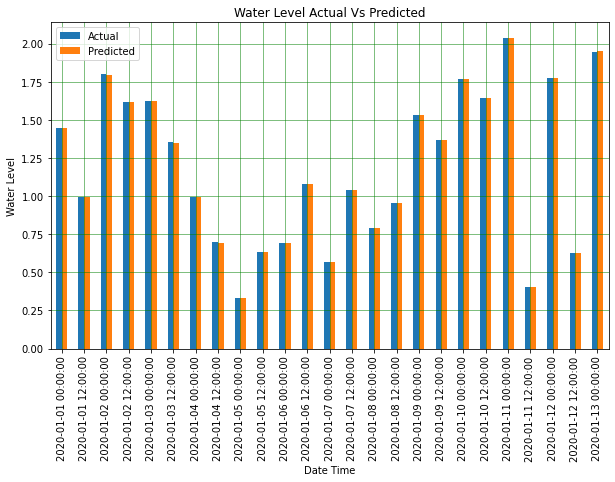

In [ ]:
df2 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred5})
df3 = df2.head(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
plt.show()

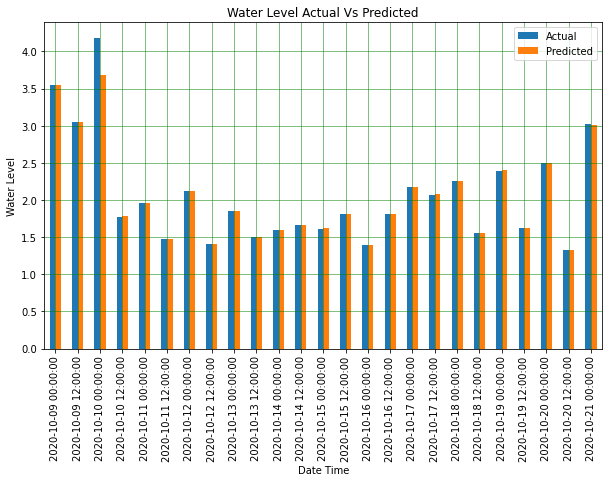

In [ ]:
df2 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred5})
df3 = df2.tail(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
plt.show()

In [ ]:
df2.to_csv (r'C:\Users\vbhakta4\Desktop\model2.csv', index = True, header=True)

In [ ]:
df_Test1['Forecast'] = np.nan
df_Test1['Forecast']= y_pred5
df_Test1

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,Forecast
Date Time,,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333,1.448660
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167,0.996552
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083,1.796887
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750,1.620018
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750,1.623607
...,...,...,...,...,...,...,...
2020-10-19 00:00:00,80.223333,2.394075,0.365842,14.327708,124.325000,16.449167,2.397359
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000,1.624044
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250,2.500087


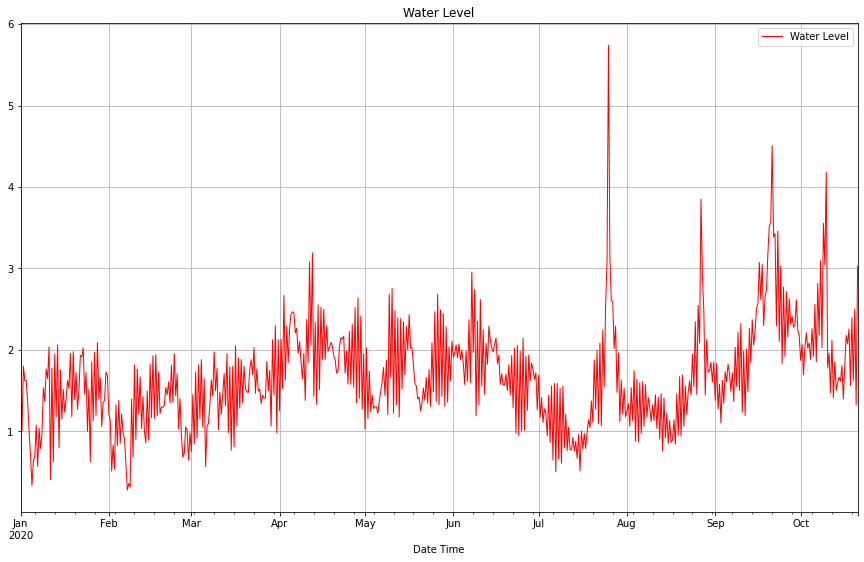

In [ ]:
df_Test1['Water Level'].plot(label='Water Level', figsize=(15, 9), title='Water Level', color='red', linewidth=1.0, grid=True)
plt.legend()

In [ ]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df_Test1['Water Level']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

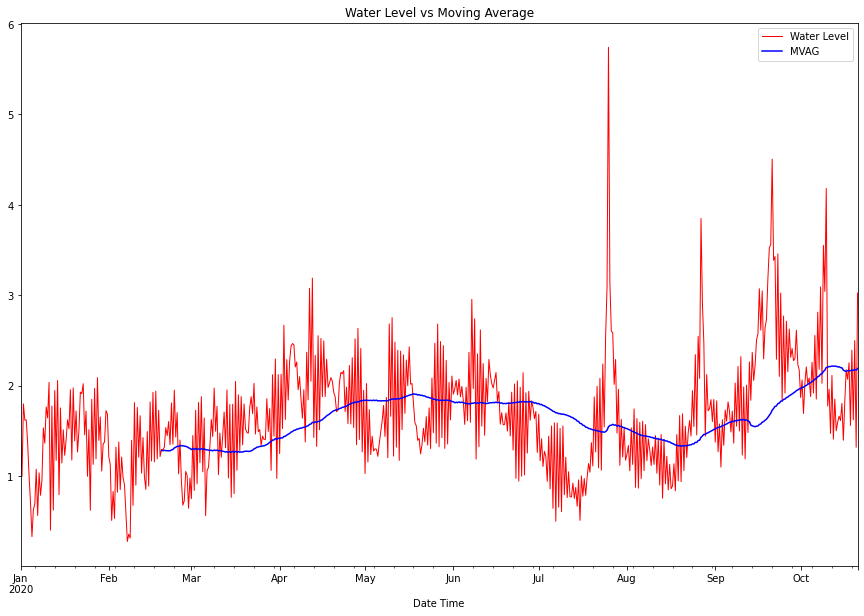

In [ ]:
df_Test1['Water Level'].plot(label='Water Level', figsize=(15,10), title='Water Level vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

[21:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


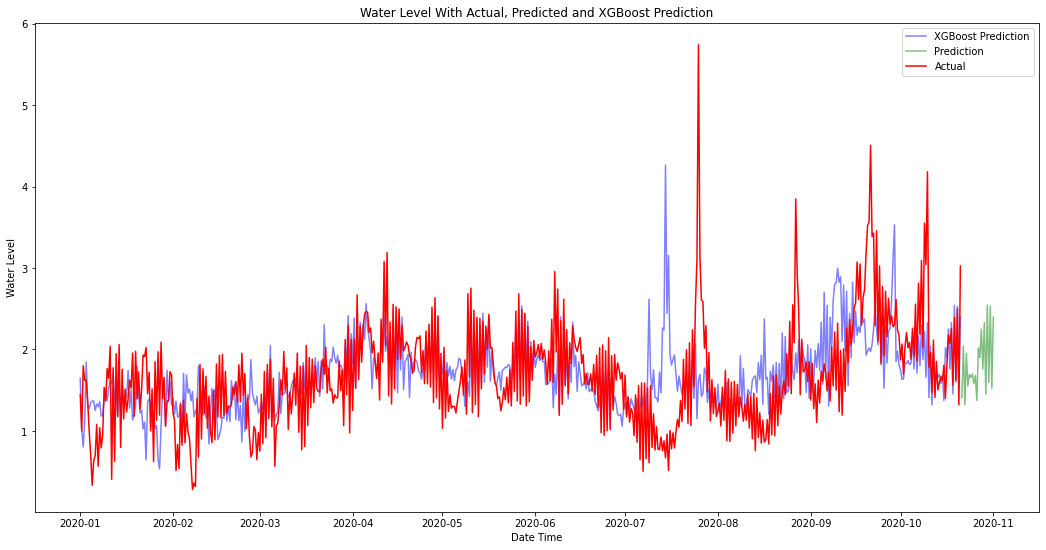

In [ ]:
#Model 2 Future Prediction
# Defining some Parameters
from datetime import datetime, timedelta

from sklearn.model_selection import  train_test_split

# Number of days for which to predict the Water Level

predict_days = int(math.ceil(0.01 * len(df_Train1)))

# Shifting by the Number of Predict days for Prediction array

df_Test1['Prediction'] = df_Test1['Water Level'].shift(-predict_days)

# Dropping the Prediction Row

X = np.array(df_Test1.drop(['Prediction'], axis = 1))
X = X[:-predict_days]
y = np.array(df_Test1['Prediction'])
y = y[:-predict_days]      # Size upto predict_days

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
classifier1=xgboost.XGBRegressor()
classifier1.fit(x_train,y_train)
X_predict = np.array(df_Test1.drop(['Prediction'], 1))[-predict_days:]

model_predict_prediction = classifier1.predict(X_predict)
model_real_prediction = classifier1.predict(np.array(df_Test1.drop(['Prediction'], 1)))
predicted_dates = []
recent_date = df_Test1.index.max()
display_at = 0
alpha = 0.5

for i in range(predict_days):
    recent_date += timedelta(days=0.5)
    predicted_dates.append(recent_date)

plt.figure(figsize=(18, 9))
plt.plot(df_Test1.index[display_at:], model_real_prediction[display_at:], label='XGBoost Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, model_predict_prediction, label='Prediction', color='green', alpha=alpha)
plt.plot(df_Test1.index[display_at:], df_Test1['Water Level'][display_at:], label='Actual', color='red')
plt.title('Water Level With Actual, Predicted and XGBoost Prediction')
plt.xlabel('Date Time')
plt.ylabel('Water Level')
plt.legend()

In [ ]:
#Model 2 Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import max_error,median_absolute_error
print('Model 2 Metrics after hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(y_test1, y_pred5))  
print('Mean Squared Error:', mean_squared_error(y_test1, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test1, y_pred5)))
print('Maximum Residual Error:', max_error(y_test1, y_pred5)) 
print('Median Absolute Error:',median_absolute_error(y_test1, y_pred5)) 
test_set_r21 = r2_score(y_test1, y_pred5)
print(test_set_r21)


Model 2 Metrics after hyperparameters tuning
Mean Absolute Error: 0.0074849013993110525
Mean Squared Error: 0.008825897954101415
Root Mean Squared Error: 0.0939462503461496
Maximum Residual Error: 2.0584587835947685
Median Absolute Error: 0.0007740244547518316
0.9777833047553547


Model 3: All Features without Water Level with another technique of handling Missing Values(By Mean)

In [ ]:
#Model 3
bhp1 = pd.read_csv("drive/My Drive/Colab Notebooks/TideXGboost/bhp/BHPtraining.csv")
bhp2 = bhp1.fillna(bhp1.mean())
bhp3 = pd.read_csv('drive/My Drive/Colab Notebooks/TideXGboost/bhp/BHPtest.csv')
bhp4 = bhp3.fillna(bhp3.mean())

In [ ]:
bhp2['Date Time'] = pd.to_datetime(bhp2['Date Time'])
df_train2 = bhp2.set_index('Date Time').resample('12H').mean()
df_train2

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,64.326560,1.944258,0.163250,5.905194,143.209146,6.638829
2017-01-01 12:00:00,68.385000,1.280625,0.137633,10.070750,143.150000,11.800750
2017-01-02 00:00:00,66.775833,2.021567,0.110650,11.112167,131.641667,12.187750
2017-01-02 12:00:00,72.377500,0.758417,0.105017,9.511750,233.975000,12.013917
2017-01-03 00:00:00,63.644167,1.488425,0.148100,4.435417,220.733333,5.413667
...,...,...,...,...,...,...
2019-12-29 12:00:00,67.654167,0.945117,0.486375,10.266750,278.383333,12.994667
2019-12-30 00:00:00,59.510833,1.871167,0.344325,10.535750,216.491667,12.497333
2019-12-30 12:00:00,58.531667,0.839258,0.269725,10.983917,108.775000,12.876000


In [ ]:
bhp4['Date Time'] = pd.to_datetime(bhp4['Date Time'])
df_test2 = bhp4.set_index('Date Time').resample('12H').mean()
df_test2

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750
...,...,...,...,...,...,...
2020-10-19 00:00:00,80.183400,2.387644,0.365088,14.322200,124.468962,16.442233
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250


In [ ]:
df_Train2= df_train2.copy()
df_Test2= df_test2.copy()
X_train2=df_Train2.drop(['Water Level'],axis=1)
y_train2=df_Train2['Water Level']
import xgboost
classifier3=xgboost.XGBRegressor()
classifier3.fit(X_train2,y_train2)
X_test2 = df_Test2.drop(['Water Level'],axis=1)
Y_test2 = df_Test2['Water Level']
Y_pred2=classifier.predict(X_test2)


[21:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#Model 3 Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error,median_absolute_error
print('Model 3 Metrics before hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(Y_test2, Y_pred2))  
print('Mean Squared Error:', mean_squared_error(Y_test2, Y_pred2))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
print('Maximum Residual Error:', max_error(Y_test2, Y_pred2))
print('Median Absolute Error:',median_absolute_error(Y_test2, Y_pred2))
print('R2 Score:', r2_score(Y_test2, Y_pred2))



Model 3 Metrics before hyperparameters tuning
Mean Absolute Error: 0.4292365824675032
Mean Squared Error: 0.3166139304584987
Root Mean Squared Error: 0.5626845745695351
Maximum Residual Error: 3.2032081865946465
Median Absolute Error: 0.3377335322062167
R2 Score: 0.19892274320778147


Model 3 : Hyper Parameter Optimization 

In [ ]:
import xgboost
regressor2=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv2 = RandomizedSearchCV(estimator=regressor2,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv2.fit(X_train2,y_train2)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.9min


[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [ ]:
random_cv2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
random_cv2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print('Best Score: %s' % random_cv2.best_score_)

Best Score: -0.42175476030577624


In [ ]:
regressor2=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor2.fit(X_train2,y_train2)

[21:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred4 = regressor2.predict(X_test2)


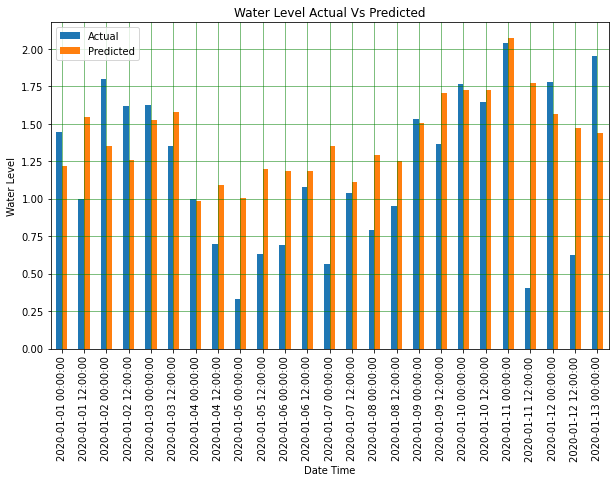

In [ ]:
df2 = pd.DataFrame({'Actual': Y_test2, 'Predicted': y_pred4})
df3 = df2.head(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
#plt.savefig('Water Level Actual Vs Predicted Model 3 head.png')
plt.show()

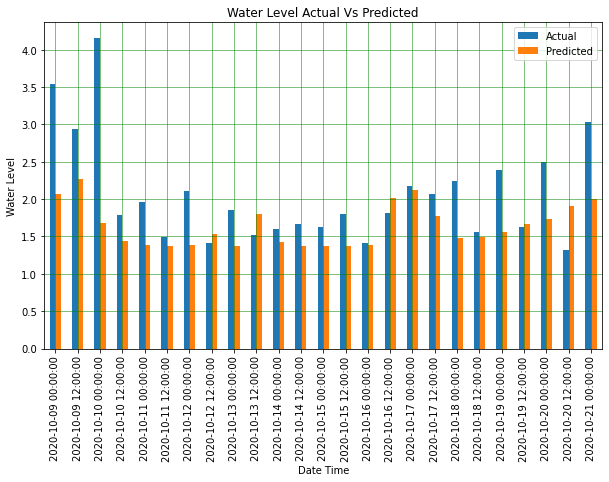

In [ ]:
df2 = pd.DataFrame({'Actual': Y_test2, 'Predicted': y_pred4})
df3 = df2.tail(25)

df3.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Water Level Actual Vs Predicted')
plt.ylabel('Water Level')
#plt.savefig('Water Level Actual Vs Predicted Model 3 tail.png')
plt.show()

In [ ]:
df2.to_csv (r'C:\Users\vbhakta4\Desktop\model3.csv', index = True, header=True)

In [ ]:
df_Test2['Forecast'] = np.nan
df_Test2['Forecast'] = y_pred4
df_Test2

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust,Forecast
Date Time,,,,,,,
2020-01-01 00:00:00,61.254167,1.446283,0.177275,12.126000,44.833333,14.075333,1.220984
2020-01-01 12:00:00,62.968333,0.997042,0.255058,6.373167,193.050000,8.036167,1.543323
2020-01-02 00:00:00,58.952500,1.800817,0.267158,5.165750,203.475000,6.442083,1.350993
2020-01-02 12:00:00,62.555833,1.620708,0.257675,10.857750,148.133333,12.629750,1.257918
2020-01-03 00:00:00,60.619167,1.622983,0.299800,5.458833,231.733333,7.068750,1.526202
...,...,...,...,...,...,...,...
2020-10-19 00:00:00,80.183400,2.387644,0.365088,14.322200,124.468962,16.442233,1.553834
2020-10-19 12:00:00,82.254167,1.624092,0.376333,11.625750,116.833333,13.247000,1.664538
2020-10-20 00:00:00,80.181667,2.500308,0.409258,16.382083,112.808333,18.628250,1.733669


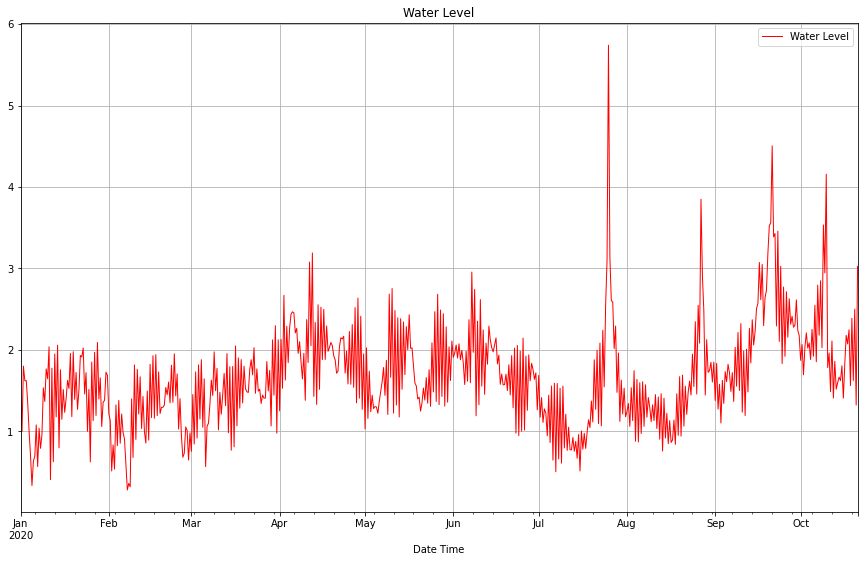

In [ ]:
df_Test2['Water Level'].plot(label='Water Level', figsize=(15, 9), title='Water Level', color='red', linewidth=1.0, grid=True)
plt.legend()

In [ ]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col2 = df_Test2['Water Level']
mvag2 = close_col2.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

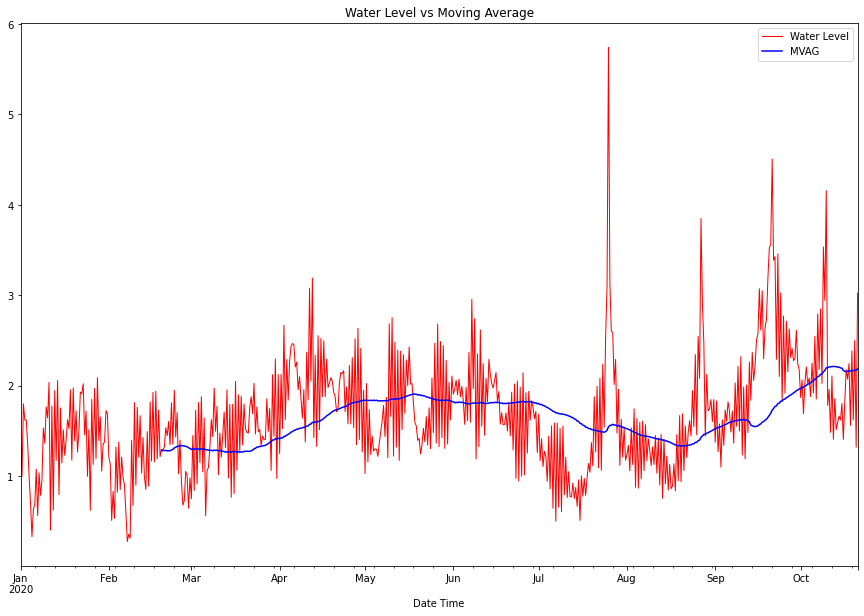

In [ ]:
df_Test2['Water Level'].plot(label='Water Level', figsize=(15,10), title='Water Level vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag2.plot(label='MVAG', color='blue')
#plt.savefig('Water Level Actual Vs Moving Average.png')
plt.legend()

[21:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


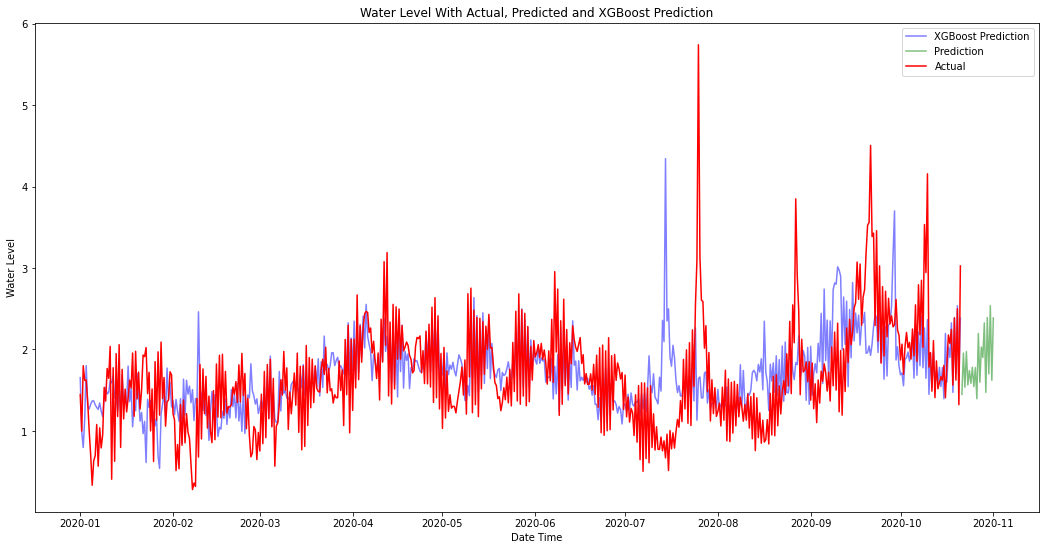

In [ ]:
#Model 3 Future Prediction
# Defining some Parameters
from datetime import datetime, timedelta

from sklearn.model_selection import  train_test_split

# Number of days for which to predict the Water Level

predict_days = predict_days = int(math.ceil(0.01 * len(df_Train2)))

# Shifting by the Number of Predict days for Prediction array

df_Test2['Prediction'] = df_Test2['Water Level'].shift(-predict_days)

# Dropping the Prediction Row

X = np.array(df_Test2.drop(['Prediction'], axis = 1))
X = X[:-predict_days]
y = np.array(df_Test2['Prediction'])
y = y[:-predict_days]      # Size upto predict_days

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
classifier4=xgboost.XGBRegressor()
classifier4.fit(x_train,y_train)
X_predict = np.array(df_Test2.drop(['Prediction'], 1))[-predict_days:]

model_predict_prediction = classifier4.predict(X_predict)
model_real_prediction = classifier4.predict(np.array(df_Test2.drop(['Prediction'], 1)))
predicted_dates = []
recent_date = df_Test2.index.max()
display_at = 0
alpha = 0.5

for i in range(predict_days):
    recent_date += timedelta(days=0.5)
    predicted_dates.append(recent_date)

plt.figure(figsize=(18, 9))
plt.plot(df_Test2.index[display_at:], model_real_prediction[display_at:], label='XGBoost Prediction', color='blue', alpha=alpha)
plt.plot(predicted_dates, model_predict_prediction, label='Prediction', color='green', alpha=alpha)
plt.plot(df_Test2.index[display_at:], df_Test2['Water Level'][display_at:], label='Actual', color='red')
plt.title('Water Level With Actual, Predicted and XGBoost Prediction')
plt.xlabel('Date Time')
plt.ylabel('Water Level')
#plt.savefig('Water Level Actua , Predicted Model 3.png')
plt.legend()

In [ ]:
#Model 3 Metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error,median_absolute_error
print('Model 3 Metrics after hyperparameters tuning')
print('Mean Absolute Error:', mean_absolute_error(Y_test2, y_pred4))  
print('Mean Squared Error:', mean_squared_error(Y_test2, y_pred4))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test2, y_pred4)))
print('Maximum Residual Error:', max_error(Y_test2, y_pred4))
print('Median Absolute Error:',median_absolute_error(Y_test2, y_pred4))
print('R2 Score:', r2_score(Y_test2, y_pred4))

Model 3 Metrics after hyperparameters tuning
Mean Absolute Error: 0.4228374035254451
Mean Squared Error: 0.3079653169101469
Root Mean Squared Error: 0.5549462288457746
Maximum Residual Error: 3.216395356623333
Median Absolute Error: 0.3634427319844564
R2 Score: 0.22080493773515675
